In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("C:\\Users\\91762\\Music\\TY_SEM_2\\DT\\AMAZON.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,15-05-1997,2.437500,2.500000,1.927083,1.958333,1.958333,72156000.0
1,16-05-1997,1.968750,1.979167,1.708333,1.729167,1.729167,14700000.0
2,19-05-1997,1.760417,1.770833,1.625000,1.708333,1.708333,6106800.0
3,20-05-1997,1.729167,1.750000,1.635417,1.635417,1.635417,5467200.0
4,21-05-1997,1.635417,1.645833,1.375000,1.427083,1.427083,18853200.0


In [4]:
df.shape

(1209, 7)

In [5]:
missing_values = ['NONE', 'None', 'none', 'NAN', 'Nan', 'nan', 'NA', 'Na', 'na']
dataset = pd.read_csv('C:\\Users\\91762\\Music\\TY_SEM_2\\DT\\AMAZON.csv', na_values = missing_values)
df.dropna(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205 entries, 0 to 1204
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1205 non-null   object 
 1   Open       1205 non-null   float64
 2   High       1205 non-null   float64
 3   Low        1205 non-null   float64
 4   Close      1205 non-null   float64
 5   Adj Close  1205 non-null   float64
 6   Volume     1205 non-null   float64
dtypes: float64(6), object(1)
memory usage: 75.3+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1.205000e+03
mean,30.878404,32.102485,29.567925,30.805085,30.805085,1.246597e+07
std,27.005560,27.978288,25.837557,26.855593,26.855593,1.157930e+07
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,8.010417,8.291667,7.765625,8.010417,8.010417,5.424800e+06
50%,18.000000,18.645834,17.062500,17.791666,17.791666,8.695500e+06
75%,54.687500,57.250000,52.500000,54.937500,54.937500,1.559040e+07
max,111.937500,113.000000,104.437500,106.687500,106.687500,1.017972e+08


<AxesSubplot:xlabel='Date'>

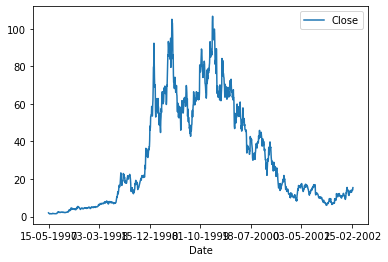

In [8]:
df.plot(x="Date",y="Close")

(906, 4)

(906,)

(303, 4)

In [14]:
model = RandomForestRegressor()

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [17]:
X = df[["Open","High","Low","Volume"]]
X = X[:int(len(df)-1)]
y = df['Close']
y = y[:int(len(df)-1)]
model.fit(X,y)

RandomForestRegressor()

In [18]:
predications = model.predict(X)
predications

array([ 2.07302064,  1.78812518,  1.69114569, ..., 14.34635521,
       14.29347917, 14.141825  ])

In [19]:
model.score(X,y)

0.99972533159474

In [20]:
new_data = df[["Open","High","Low","Volume"]].tail(1)
prediction = model.predict(new_data)
print("from model: ",prediction)
print("Actual value: ", df[["Close"]].tail(1).values[0][0])

from model:  [14.75959998]
Actual value:  15.39


AttributeError: 'RandomForestRegressor' object has no attribute 'tree_'

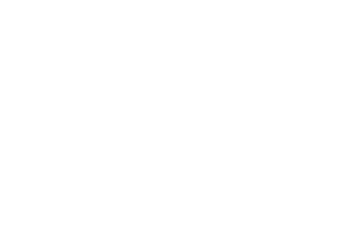

In [21]:
# 10 days prediction 
#  n_steps = 100
from sklearn.tree import plot_tree
plot_tree(model)
 